##### Maestría Inteligencia de Negocios y Análisis de Datos
##### Curso: Statistical Learning I
##### Alumno: 22008375- Leonel Eduardo Contreras
##### Alumno: 22008067- Luis Pedro Perez
##### Sección L

## Proyecto Final

#### 1. Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Cargar Dataset

In [2]:
dataset=pd.read_csv('airline_satisfaction.csv')

#### 3. Exploración de Datos

In [35]:
# Dataset
dataset.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
1,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
2,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
3,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
4,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied


In [37]:
# Forma de dataset
dataset.shape

(129880, 24)

In [38]:
# Variables del dataset
dataset.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [39]:
# Tipos de datos
dataset.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [13]:
# Variables con Nulos
cols_Nan=[col for col in dataset.columns if(dataset[col].isnull().mean()>0)]
cols_Nan

['Arrival Delay in Minutes']

In [21]:
# Media de las variables con Nulos
dataset[cols_Nan].isnull().mean()

Arrival Delay in Minutes    0.003026
dtype: float64

In [41]:
# Tipo de dato de la varaibles con Nulos
dataset[cols_Nan].dtypes

Arrival Delay in Minutes    float64
dtype: object

#### 4. Imputación de Datos

##### a. Eliminar faltantes

In [42]:
## Eliminar del dataset los NaN
data_no_Nan=dataset.dropna()
data_no_Nan

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
1,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
2,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
3,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
4,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,Loyal Customer,28,Personal Travel,Eco Plus,447,4,4,4,...,4,5,4,4,4,5,4,2,3.0,neutral or dissatisfied
129876,129877,Male,Loyal Customer,41,Personal Travel,Eco Plus,308,3,5,3,...,2,5,5,5,5,4,2,0,0.0,neutral or dissatisfied
129877,129878,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied
129878,129879,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,satisfied


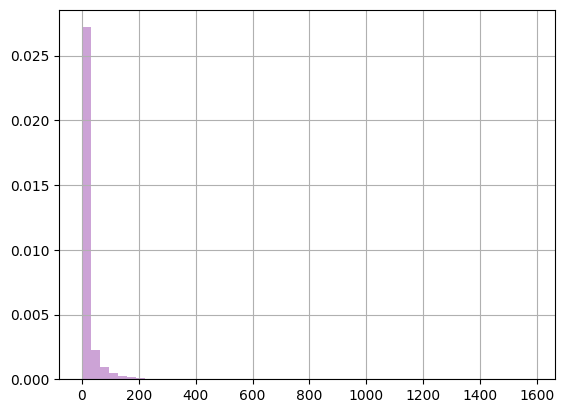

In [48]:
## Grafica para comparar la distorcion de la data original contra la data sin NAN
dataset['Arrival Delay in Minutes'].hist(bins=50,density=True,color='red',alpha=0.2)
data_no_Nan['Arrival Delay in Minutes'].hist(bins=50,density=True,color='blue',alpha=0.2)
plt.show()

##### b. Imputación Media y Mediana

In [52]:
# Obtener la Media y Mediana de la Variable Null

media=round(dataset['Arrival Delay in Minutes'].mean(),4)
mediana=round(dataset['Arrival Delay in Minutes'].median(),4)

print(f'La media de la variables es: {media} y la mediana es: {mediana}')

La media de la variables es: 15.0911 y la mediana es: 0.0


In [53]:
# Se copia la data original para no afectarla con el analisis de la imputación de media y mediana
data_med=dataset.copy() 

In [54]:
# Se crean las varaibles en el dataset con la media y mediana
data_med['Arrival_Delay_Mean']=data_med['Arrival Delay in Minutes'].fillna(media)
data_med['Arrival_Delay_Median']=data_med['Arrival Delay in Minutes'].fillna(mediana)

# Se despliegan las columnas para verificar si se imputaron los datos
data_med[['Arrival Delay in Minutes','Arrival_Delay_Mean','Arrival_Delay_Median']][data_med['Arrival Delay in Minutes'].isnull()]

,Arrival Delay in Minutes,Arrival_Delay_Mean,Arrival_Delay_Median
246,NaN,15.0911,0.0
883,NaN,15.0911,0.0
1965,NaN,15.0911,0.0
2407,NaN,15.0911,0.0
2448,NaN,15.0911,0.0
...,...,...,...
129000,NaN,15.0911,0.0
129003,NaN,15.0911,0.0
129014,NaN,15.0911,0.0
129015,NaN,15.0911,0.0


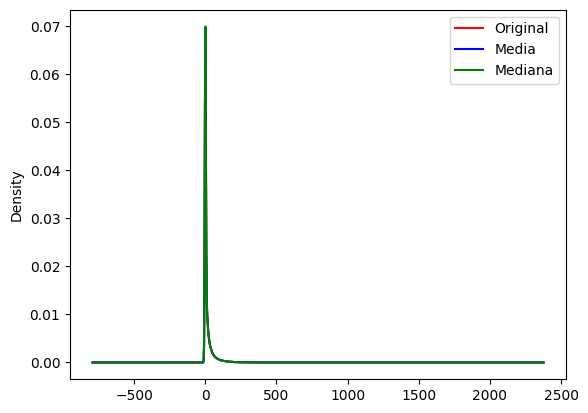

In [59]:
##Graficas para observar la distorcion entre la variable original, la imputación de media y la imputación de mediana
fig=plt.figure()
ax=fig.add_subplot(111)

data_med['Arrival Delay in Minutes'].plot.density(color='red',label='Original')
data_med['Arrival_Delay_Mean'].plot.density(color='blue',label='Media')
data_med['Arrival_Delay_Median'].plot.density(color='green',label='Mediana')
ax.legend()
plt.show()

<Axes: >

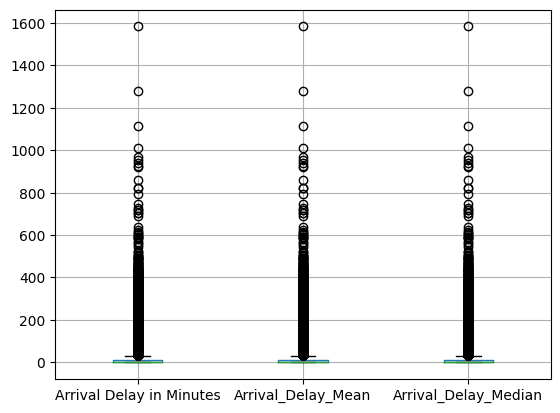

In [60]:
data_med[['Arrival Delay in Minutes','Arrival_Delay_Mean','Arrival_Delay_Median']].boxplot()

##### c. Valores arbitrarios

In [61]:
## Obtener IQR, LS y LI

IQR=dataset['Arrival Delay in Minutes'].quantile(0.75)-dataset['Arrival Delay in Minutes'].quantile(0.25) #Q3 - Q1
LI=dataset['Arrival Delay in Minutes'].quantile(0.25)-(IQR*1.75) #limite inferior
LS=dataset['Arrival Delay in Minutes'].quantile(0.75)+(IQR*1.75)# limite superior

print(f"IQR: {IQR}, LI: {LI}, LS: {LS}")

IQR: 13.0, LI: -22.75, LS: 35.75


In [63]:
# Se copia la data original para no afectarla con el analisis de la imputación de valor arbitrario
data_arb=dataset.copy() 

In [64]:
# Crear variables con extremo superior e inferior en lugar de los NaN (No se elige extremo inferior por ser negativo, sino Ceros)
data_arb['LS_Arrival_Delay']=data_arb['Arrival Delay in Minutes'].fillna(LS)
data_arb['LI_Arrival_Delay']=data_arb['Arrival Delay in Minutes'].fillna(0)

# Se despliegan las columnas para verificar si se imputaron los datos
data_arb[['Arrival Delay in Minutes','LS_Arrival_Delay','LI_Arrival_Delay']][data_arb['Arrival Delay in Minutes'].isnull()]

,Arrival Delay in Minutes,LS_Arrival_Delay,LI_Arrival_Delay
246,NaN,35.75,0.0
883,NaN,35.75,0.0
1965,NaN,35.75,0.0
2407,NaN,35.75,0.0
2448,NaN,35.75,0.0
...,...,...,...
129000,NaN,35.75,0.0
129003,NaN,35.75,0.0
129014,NaN,35.75,0.0
129015,NaN,35.75,0.0


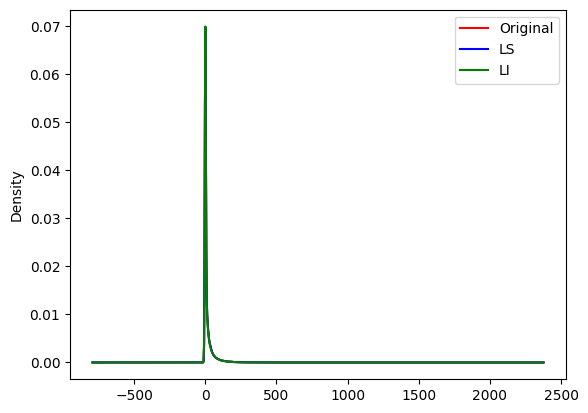

In [65]:
##Graficas para observar la distorcion entre la variable original, la imputación de LS y LI
fig=plt.figure()
ax=fig.add_subplot(111)

data_arb['Arrival Delay in Minutes'].plot.density(color='red',label='Original')
data_arb['LS_Arrival_Delay'].plot.density(color='blue',label='LS')
data_arb['LI_Arrival_Delay'].plot.density(color='green',label='LI')
ax.legend()
plt.show()

##### d. Eleccion de la imputación

In [66]:
##Se elige la media para imputar los nulos y se convierte la columna original en la columna nueva sin nulos

dataset['Arrival Delay in Minutes']=np.round(dataset['Arrival Delay in Minutes'].fillna(media),0)


#### 5. Codificación de variables categóricas

In [68]:
##Se obtienen las variables que son categoricas

def getCategoryVars(dataset):
    cat_colnames=[]
    colnames=dataset.columns
    for col in colnames:
        if(dataset[col].dtype=='object'):
            cat_colnames.append(col)
    return cat_colnames

cat_cols=getCategoryVars(dataset)
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [71]:
# Obtener de las variables categoricas sus valores y cantidad de registros

cat_encoding=[]

for i in cat_cols:
    print("-----")
    print(dataset[i].value_counts().sort_values(ascending=False))
    cat_encoding.append(i)

-----
Female    65899
Male      63981
Name: Gender, dtype: int64
-----
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
-----
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
-----
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
-----
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64
